In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [2]:
titanic = pd.read_excel("/content/Titanic_train.xlsx")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1 , inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
titanic = titanic.loc[:, ['Pclass','Sex','Survived','Age','SibSp','Parch','Fare','Embarked']]


In [5]:
titanic.head()

,Pclass,Sex,Survived,Age,SibSp,Parch,Fare,Embarked
0,3,male,0,22.0,1,0,7.2500,S
1,1,female,1,38.0,1,0,71.2833,C
2,3,female,1,26.0,0,0,7.9250,S
3,1,female,1,35.0,1,0,53.1000,S
4,3,male,0,35.0,0,0,8.0500,S


In [6]:
titanic.isnull().sum()

,0
Pclass,0
Sex,0
Survived,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [7]:
titanic.drop('Age',axis=1,inplace=True)
titanic

,Pclass,Sex,Survived,SibSp,Parch,Fare,Embarked
0,3,male,0,1,0,7.2500,S
1,1,female,1,1,0,71.2833,C
2,3,female,1,0,0,7.9250,S
3,1,female,1,1,0,53.1000,S
4,3,male,0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,0,0,0,13.0000,S
887,1,female,1,0,0,30.0000,S
888,3,female,0,1,2,23.4500,S
889,1,male,1,0,0,30.0000,C


In [8]:
titanic.isnull().sum()

,0
Pclass,0
Sex,0
Survived,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [9]:
titanic.describe()

,Pclass,Survived,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.383838,0.523008,0.381594,32.204208
std,0.836071,0.486592,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,8.000000,6.000000,512.329200


In [30]:
 titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Survived    891 non-null    int64  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_Q  891 non-null    int64  
 7   Embarked_S  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [31]:
titanic['Sex'].replace({'male':1,'female':0},inplace=True)

In [12]:
titanic.head()

,Pclass,Sex,Survived,SibSp,Parch,Fare,Embarked
0,3,1,0,1,0,7.2500,S
1,1,0,1,1,0,71.2833,C
2,3,0,1,0,0,7.9250,S
3,1,0,1,1,0,53.1000,S
4,3,1,0,0,0,8.0500,S


In [13]:
titanic['Parch'].isnull().sum()

np.int64(0)

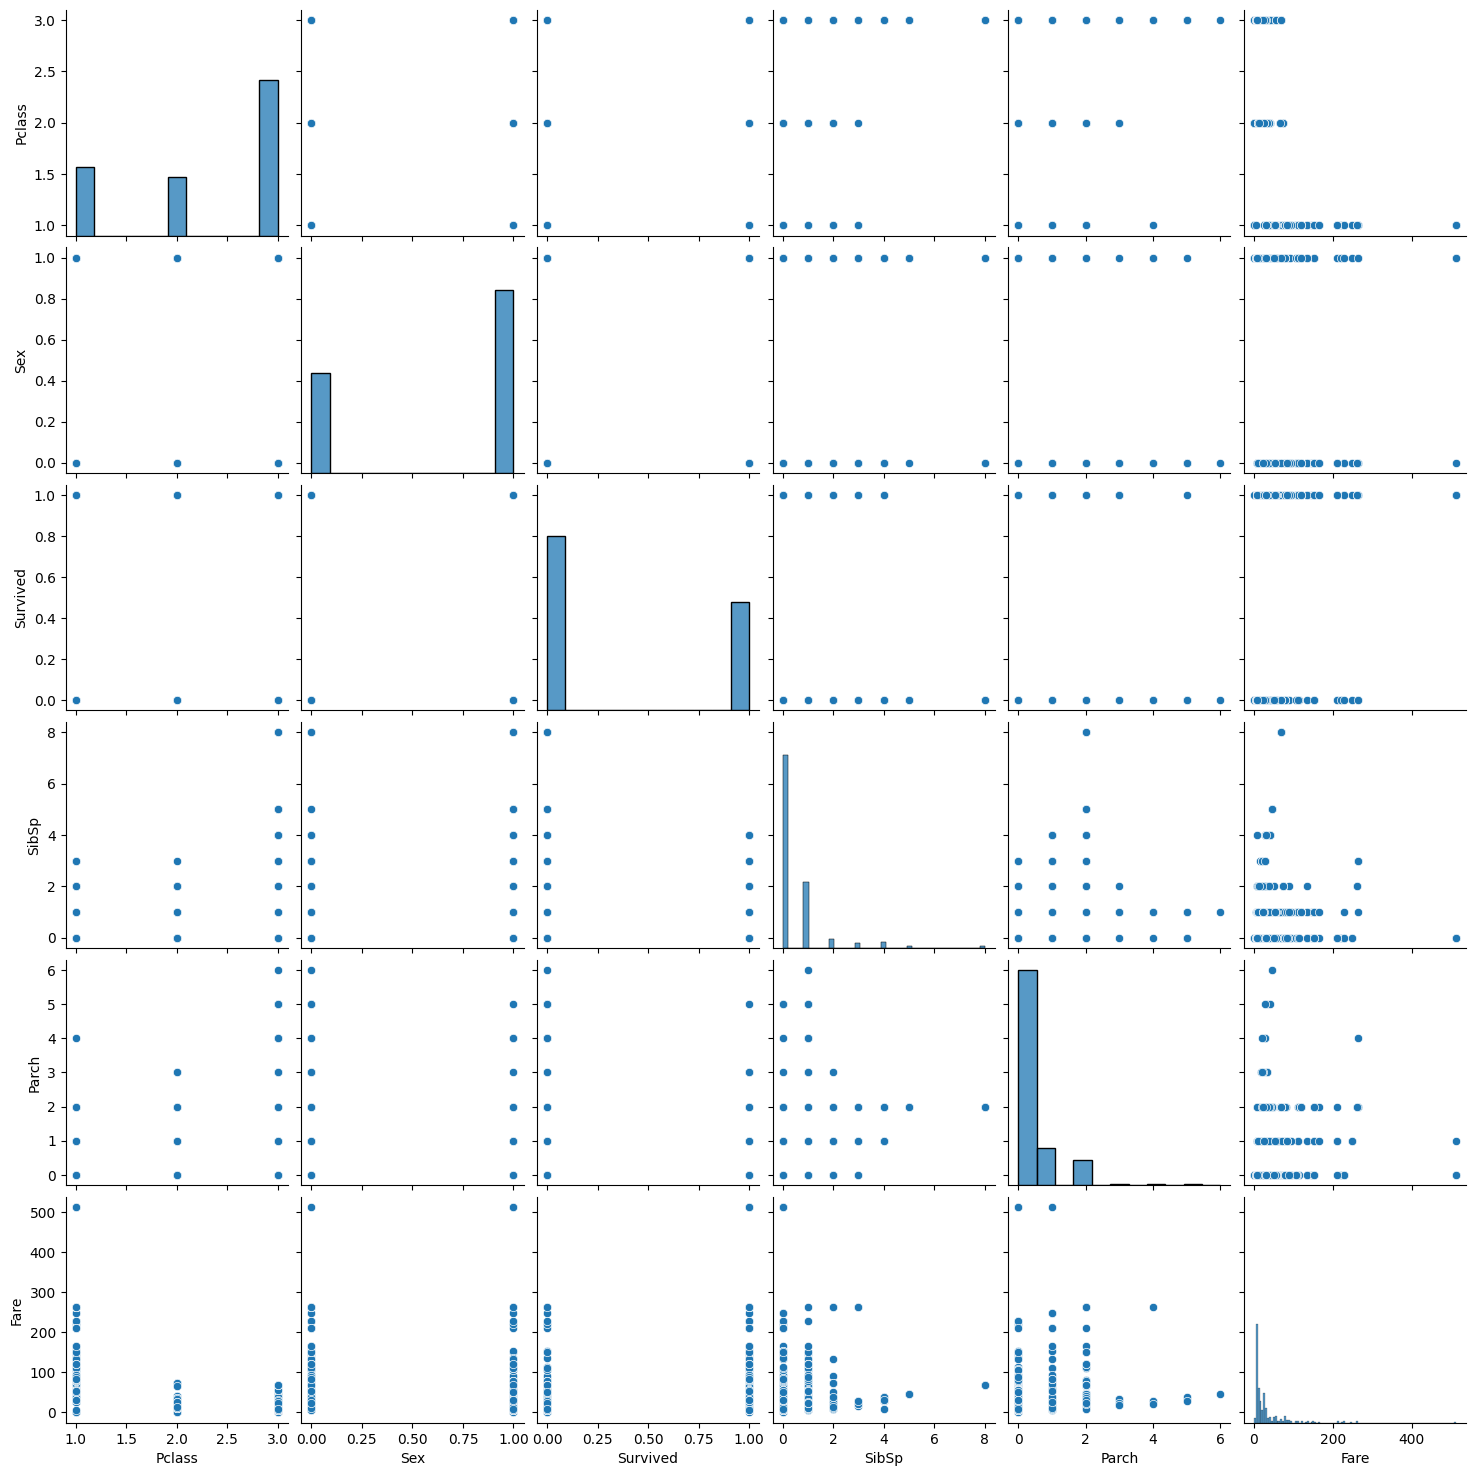

In [14]:
sns.pairplot(titanic)

<Axes: xlabel='Sex', ylabel='Count'>

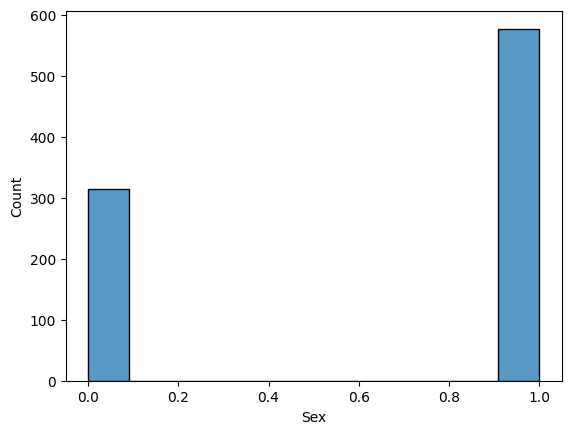

In [15]:
sns.histplot(titanic['Sex'])

<Axes: ylabel='Embarked'>

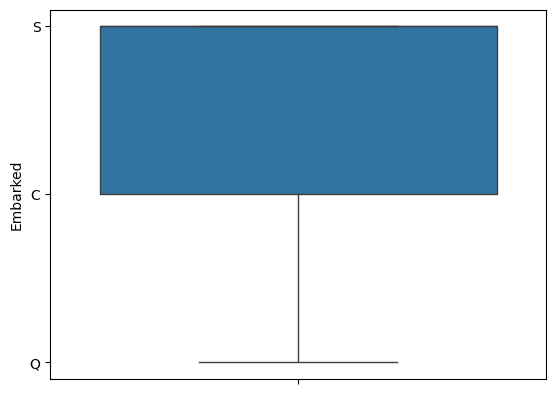

In [16]:
sns.boxplot(titanic['Embarked'])

In [17]:
import pandas as pd

titanic = pd.get_dummies(titanic, columns=['Embarked'],drop_first=True, dtype=int)


In [18]:
titanic

,Pclass,Sex,Survived,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,0,1,0,7.2500,0,1
1,1,0,1,1,0,71.2833,0,0
2,3,0,1,0,0,7.9250,0,1
3,1,0,1,1,0,53.1000,0,1
4,3,1,0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,0,0,0,13.0000,0,1
887,1,0,1,0,0,30.0000,0,1
888,3,0,0,1,2,23.4500,0,1
889,1,1,1,0,0,30.0000,0,0


In [19]:
X = titanic.loc[:,['Pclass','Sex','SibSp','Parch','Fare','Embarked_Q','Embarked_S']]
Y= titanic.loc[:,['Survived']]

In [20]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [21]:
classifier.coef_

array([[-0.82561522, -2.5934749 , -0.21723901, -0.04185379,  0.00268549,
         0.12603969, -0.35345427]])

In [22]:
beta_coefficient = pd.Series(classifier.coef_[0])
beta_coefficient,

(0   -0.825615
 1   -2.593475
 2   -0.217239
 3   -0.041854
 4    0.002685
 5    0.126040
 6   -0.353454
 dtype: float64,)

In [23]:
coef_df = pd.DataFrame({'Features':X.columns,'Coefficient':beta_coefficient})
coef_df

,Features,Coefficient
0,Pclass,-0.825615
1,Sex,-2.593475
2,SibSp,-0.217239
3,Parch,-0.041854
4,Fare,0.002685
5,Embarked_Q,0.126040
6,Embarked_S,-0.353454


In [24]:
np.set_printoptions(precision=2,suppress=True)
preb_prob  = classifier.predict_proba(X)
preb_prob

array([[0.91, 0.09],
       [0.08, 0.92],
       [0.39, 0.61],
       ...,
       [0.45, 0.55],
       [0.52, 0.48],
       [0.84, 0.16]])

In [25]:
y_pred =classifier.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [26]:
Y = np.array(Y)
Y = Y.flatten()
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [27]:
y_pred_df = pd.DataFrame({'Actual':Y,'Predicted':y_pred})
y_pred_df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


In [28]:
#survival death mostly equal to predicted values


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [35]:
titanic.corr()

,Pclass,Sex,Survived,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Pclass,1.000000,0.131900,-0.338481,0.083081,0.018443,-0.549500,0.221009,0.081720
Sex,0.131900,1.000000,-0.543351,-0.114631,-0.245489,-0.182333,-0.074115,0.125722
Survived,-0.338481,-0.543351,1.000000,-0.035322,0.081629,0.257307,0.003650,-0.155660
SibSp,0.083081,-0.114631,-0.035322,1.000000,0.414838,0.159651,-0.026354,0.070941
Parch,0.018443,-0.245489,0.081629,0.414838,1.000000,0.216225,-0.081228,0.063036
Fare,-0.549500,-0.182333,0.257307,0.159651,0.216225,1.000000,-0.117216,-0.166603
Embarked_Q,0.221009,-0.074115,0.003650,-0.026354,-0.081228,-0.117216,1.000000,-0.496624
Embarked_S,0.081720,0.125722,-0.155660,0.070941,0.063036,-0.166603,-0.496624,1.000000


<Axes: >

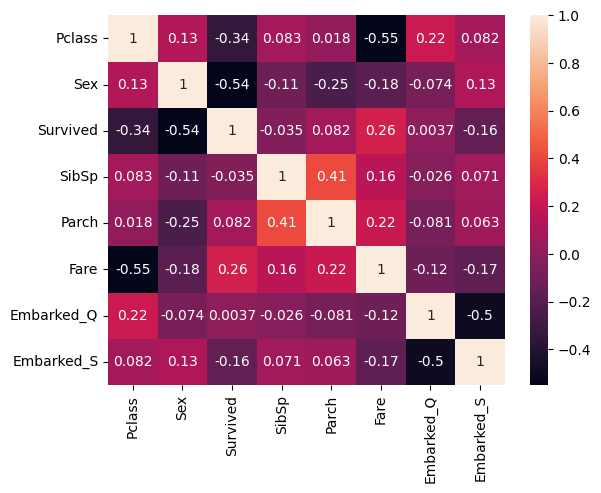

In [36]:
sns.heatmap(titanic.corr(),annot=True)

In [38]:
import pickle

with open("titanic_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [40]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [41]:
import streamlit as st
import pickle
import pandas as pd

# Load trained model
@st.cache(allow_output_mutation=True)
def load_model():
    return pickle.load(open("titanic_model.pkl","rb"))

model = load_model()
st.title("Titanic Survival Predictor")

# Sidebar inputs
pclass = st.sidebar.selectbox("Cabin Class", [1,2,3])
sex = st.sidebar.selectbox("Sex", ["male","female"])
age = st.sidebar.slider("Age", 0, 100, 30)
sibsp = st.sidebar.number_input("Siblings/Spouses Aboard", 0, 10, 0)
parch = st.sidebar.number_input("Parents/Children Aboard", 0, 10, 0)
fare = st.sidebar.number_input("Fare ( $)", 0.0, 600.0, 50.0)
embarked = st.sidebar.selectbox("Port Embarked", ["C","Q","S"])

2025-07-07 07:18:18.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 07:18:18.523 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-07 07:18:18.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 07:18:18.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 07:18:18.529 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

202

In [ ]:
# Prediction
if st.button("Predict Survival"):
    X_new = pd.DataFrame([{
        "Pclass": pclass,
        "Sex": sex,
        "Age": age,
        "SibSp": sibsp,
        "Parch": parch,
        "Fare": fare,
        "Embarked": embarked
    }])
    p = model.predict_proba(X_new)[0,1]
    st.write(f"🛟 Survival Probability: {p:.1%}")


In [42]:
streamlit run app.py


SyntaxError: invalid syntax (ipython-input-42-507122745.py, line 1)

Now that streamlit is installed, you can run the streamlit app cell again.

In [44]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd

# Load trained model
@st.cache_resource
def load_model():
    return pickle.load(open("titanic_model.pkl","rb"))

model = load_model()
st.title("Titanic Survival Predictor")

# Sidebar inputs
pclass = st.sidebar.selectbox("Cabin Class", [1,2,3])
sex = st.sidebar.selectbox("Sex", ["male","female"])
age = st.sidebar.slider("Age", 0, 100, 30)
sibsp = st.sidebar.number_input("Siblings/Spouses Aboard", 0, 10, 0)
parch = st.sidebar.number_input("Parents/Children Aboard", 0, 10, 0)
fare = st.sidebar.number_input("Fare ( $)", 0.0, 600.0, 50.0)
embarked = st.sidebar.selectbox("Port Embarked", ["C","Q","S"])

# Prediction
if st.button("Predict Survival"):
    # Prepare input data for prediction
    input_data = {
        "Pclass": pclass,
        "Sex": 1 if sex == "male" else 0, # Convert 'Sex' to numerical
        "Age": age,
        "SibSp": sibsp,
        "Parch": parch,
        "Fare": fare,
        "Embarked_Q": 1 if embarked == "Q" else 0, # One-hot encode 'Embarked'
        "Embarked_S": 1 if embarked == "S" else 0  # One-hot encode 'Embarked'
    }
    X_new = pd.DataFrame([input_data])

    # Ensure the columns are in the same order as the training data
    # Assuming the training data columns were ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
    expected_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
    X_new = X_new[expected_columns]

    p = model.predict_proba(X_new)[0,1]
    st.write(f"🛟 Survival Probability: {p:.1%}")

Writing app.py


In [ ]:
get_ipython().system('streamlit run app.py')




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.105.45.173:8501

